### Data cleaning checklist
   - [Save original data](#Saving-original-data)
   - [Identifying missing data](#Identifying-missing-data)
   - [Identifying placeholder data](#Identifying-placeholder-data)
   - [Identifying outliers](#Identifying-outliers)
   - [Check for overall plausibility and errors:](#Check-for-overall-plausibility-and-errors)
       - [Observation](#Check-for-overall-plausibility-and-errors-Observation:)
   - [Identifying highly correlated variables](#Identifying-highly-correlated-variables)
   - [Identifying variables with (nearly) no variance](#Identifying-variables-with-nearly-no-variance)
       - [Observation](#Identifying-variables-with-nearly-no-variance-observation:)
   - [Identify variables with strange names or values](#Identify-variables-with-strange-names-or-values)
   - [Check variable classes](#Check-variable-classes)
   - [Remove/transform some variables](#Remove-or-transform-some-variables)
   - [Rename some variables or values](#Rename-some-variables-or-values)
   - [Check some overall pattern](#Check-some-overall-pattern)
   
   - [Exploratory Data Analysis](#Exploratory-Data-Analysis)

In [50]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('kc_house_data.csv')
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data cleaning checklist

### Saving original data

In [51]:
import os
directory = './data/original'

# creating directory if doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
# writing data into the file
df.to_csv('./data/original/kc_house_data.csv')

### Identifying missing data

In [52]:
df.get_dtype_counts()

float64     5
int64      16
object      1
dtype: int64

In [53]:
cols_with_missing = [col for col in df.columns 
                                 if df[col].isnull().any() or df[col].isna().any()]
print("missing value columns")
print(cols_with_missing)

missing value columns
[]


#### This means that the dataset does not have any missing values

### Identifying placeholder data

In [54]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observation: It is kind of clear that value 0 in yr_renovated column is for placeholding.

### Identifying outliers

In [55]:
from scipy.stats import multivariate_normal
def bivarCI(dfNum, y = 'price', outer = 10, z_score = 0.00006, cols = 2):
    
    colNum = dfNum.shape[1]
    row, col = divmod(colNum-1, cols)
    if row == 1 and col == 0: row += 1
    if col != 0: row += 1
    
    
    z_under = z_score * 0.98
    z_upper = z_score * 1.02
    
    biOutlier = dict().fromkeys(dfNum.columns, None)
    #f, axes = plt.subplots(row, cols, figsize = (4*cols, 4*row))
    #f.suptitle('Bivaraite CI', fontsize = 12)
    for ix, var1 in enumerate(dfNum.columns):
        if var1 == y: break
        r,c = divmod(ix, cols)
        dfPart = dfNum.loc[:, [var1,y]]
        dfPart = dfPart[~dfPart.isnull()].copy()
        dfPart = dfPart.loc[dfPart.loc[:, var1] != 0,:]
        dfPart = (dfPart - dfPart.mean()) / dfPart.std()
        F, X, Y, posProb = bivarConverter(dfPart, outer, z_under, z_upper, N = 700)
        #axes[r,c].contourf(X, Y, posProb)
        #axes[r,c].scatter(dfPart.loc[:, var1], dfPart.loc[:, y], alpha = 1)
        #axes[r,c].set_title('Bivaraite CI ' + var1)
        dfPartProb = F.pdf(dfPart.values)
        outIndex = dfPart.index[dfPartProb < z_score]
        biOutlier[var1] = set(outIndex.tolist())
    #f.tight_layout(rect = [0, 0.03, 1, 0.95])
    #plt.show()
    
    return biOutlier

def bivarConverter(df, outer, z_under, z_upper, N = 500):
    x_init, y_init = df.min() - outer
    x_end, y_end = df.max() + outer
    X = np.linspace(x_init, x_end, N)
    Y = np.linspace(y_init, y_end, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    F = multivariate_normal(mean=df.mean().values, cov=df.corr().values)
    posProb = F.pdf(pos)
    posProb[(z_under < posProb) & (posProb < z_upper)] = 1
    posProb[(z_under > posProb) | (posProb < z_upper)] = 0
       
    return F , X, Y, posProb

In [56]:
uniOutlier, outlierList = checkOutlier(df.loc[:, cols])
uniOutlier['sqft_basement']

NameError: name 'checkOutlier' is not defined

In [57]:
def outliers_z_score(ys):
    threshold = 4

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
#     outSample = abs(df - df.mean()) > 4 * df.std()
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs([(y-mean_y) for y in ys]) > 4 * stdev_y)
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return upper_bound, np.where((ys > upper_bound) | (ys < lower_bound))

In [12]:
def detect_outliers(cols):
    biOutlier = bivarCI(df.loc[:, cols], outer = 2, z_score = 0.00006,  cols = 4)
    biOut = outlierCounter(biOutlier, ['price'])
    totOut = uniOut.join(biOut, lsuffix='_uni', rsuffix='_bi')
    
    for outlier_type in cols:
        import math
        indices = [x[0] for x in totOut.iterrows() if not isinstance(x[1]['variable_uni'], float) and outlier_type in x[1]['variable_uni']]
        rows = [x[1] for x in totOut.iterrows()]
        outliers = [x[1][outlier_type] for x in df.iterrows() if x[0] in indices]
        print("")
        print("-",outlier_type)
        print("")
        print("Histogram of ",outlier_type, " whole data")
        plt.hist(df[outlier_type])
        plt.show()
        print("    Number of univariate outliers for ",outlier_type," ",len(outliers), " out of total ",len(df['price']))
        print("")
        print("Histogram of ",outlier_type, " outlier data. Detected with bivariate outlier detection method")
        plt.hist(outliers)
        plt.show()
        if len(outliers) > 0:
            print("    As shown in the histogram, all the data points of ",outlier_type, " above ",min(outliers)," is identified as outliers in bivariate method")
        iqr_upper, iqr_outliers = outliers_iqr(df[outlier_type])
        print()
        print("    Number of IQR outliers for ",outlier_type," ",len(iqr_outliers[0]), " out of total ",len(df['price']))
        print("")
        print("Boxplot of outlier detected with boxplot i.e. IQR method in ",outlier_type)
        sns.boxplot(y=outlier_type, data=df, fliersize=10)
        plt.show()
        print("    As shown in the histogram, all the data points of ",outlier_type, " above ",iqr_upper," is identified as outliers with IQR method")
        print("")
        print("")
        print("")

In [58]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
cols = ['sqft_living','sqft_lot', 'sqft_basement', 'price']
detect_outliers(cols)

NameError: name 'outlierCounter' is not defined

### Check for overall plausibility and errors

In [60]:
# Checking date values
print(df['date'].head())
type(df['date'][0])

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


str

As clear as it can be, we can easily convert the given datetime format into python's date time format. As demonstrated below. So there is no problem with this column.

In [61]:
from datetime import datetime

datetime_object = datetime.strptime('20141013T000000', '%Y%m%dT000000')
datetime_object

datetime.datetime(2014, 10, 13, 0, 0)

In [62]:
# Checking price values has any negative or 0 value
print("0 or negative values for price")
print(sum(df['price']<=0))

0 or negative values for price
0


In [63]:
# Checking bedrooms values
print("Bedrooms unique values")
df['bedrooms'].unique()

Bedrooms unique values


array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [64]:
# Checking bathrooms values
print("Bathrooms unique values")
df['bathrooms'].unique()

Bathrooms unique values


array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

In [65]:
# Checking sq. feet living values has any negative or 0 value
print("0 or negative values for Sq feet living")
print(sum(df['sqft_living']<=0))

0 or negative values for Sq feet living
0


In [66]:
# Checking sq. feet lot values has any negative or 0 value
print("0 or negative values for Sq feet Lot")
print(sum(df['sqft_lot']<=0))

0 or negative values for Sq feet Lot
0


In [67]:
# Checking sq. feet values has any negative or 0 value
print("0 or negative values for floor")
print(sum(df['floors']<=0))

0 or negative values for floor
0


In [68]:
# Checking values of waterfront, should be either 0 or 1
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [69]:
# Checking values of view. should contain only positive numbers
print(df['view'].unique())
print("negative values for view")
print(sum(df['floors']<0))

[0 3 4 2 1]
negative values for view
0


In [70]:
# Checking overall condition of house. Will contain rating
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [71]:
# Checking grade values
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [72]:
# Checking sq feet above. Sq feet apart from basement
print("negative or 0 values for sq feet above")
print(sum(df['sqft_above']<=0))

negative or 0 values for sq feet above
0


In [73]:
# Checking sq feet above. Sq feet apart from basement
print("negative values for sq feet basement")
print(sum(df['sqft_basement']<0))

negative values for sq feet basement
0


In [74]:
# checking year built
df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

In [75]:
# checking year renovated
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

Year renovated holds the value 0. Which indicates that it is a placeholder value and the house is never been renovated.

In [76]:
# checking zipcode values
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [77]:
# checking lat values
print("0 values for lat")
print(sum(df['lat']==0))
df['lat'].unique()

0 values for lat
0


array([ 47.5112,  47.721 ,  47.7379, ...,  47.3906,  47.3339,  47.6502])

In [78]:
# checking long values
print("0 values for long")
print(sum(df['long']==0))

0 values for long
0


In [79]:
# checking sq feet living15, Living room area in 2015(implies-- some renovations)
#This might or might not have affected the lotsize area
print("0 and negative values for sqft living15")
print(sum(df['sqft_living15']<=0))

0 and negative values for sqft living15
0


In [80]:
# checking sq feet living15, lotSize area in 2015(implies-- some renovations)
print("0 and negative values for sqft lot 15")
print(sum(df['sqft_lot15']<=0))

0 and negative values for sqft lot 15
0


In [81]:
# Checking view values
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

### check if there is any duplicated row

In [82]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
21597    False
21598    False
21599    False
21600    False
21601    False
21602    False
21603    False
21604    False
21605    False
21606    False
21607    False
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

##### Check for overall plausibility and errors Observation:
There is no missing data in dataset. There are no inappropriate values observed in dataset. The dataset seems to be logical and valid.

### Identifying highly correlated variables

In [83]:
df.corr()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.006718,0.027372,0.010794,0.107334,0.044717,-0.026877,0.179138,-0.007611,-0.013751,...,0.082050,0.071958,-0.041841,0.199549,-0.025601,-0.002199,0.000701,0.008649,0.026647,-0.029827
id,0.006718,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,0.027372,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.010794,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.107334,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.044717,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.026877,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.179138,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.007611,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,-0.013751,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [84]:
correlations = [[(index1, index2) for index2, column in row.iteritems() if column>0.6 and index1 != index2] 
 for index1, row in df.corr().iterrows()]
print("List of highly correlated variables:")
print()
for correlation in correlations:
    for item in correlation:
        print(item[0]," and ",item[1])

List of highly correlated variables:

price  and  sqft_living
price  and  grade
price  and  sqft_above
bathrooms  and  sqft_living
bathrooms  and  grade
bathrooms  and  sqft_above
sqft_living  and  price
sqft_living  and  bathrooms
sqft_living  and  grade
sqft_living  and  sqft_above
sqft_living  and  sqft_living15
sqft_lot  and  sqft_lot15
grade  and  price
grade  and  bathrooms
grade  and  sqft_living
grade  and  sqft_above
grade  and  sqft_living15
sqft_above  and  price
sqft_above  and  bathrooms
sqft_above  and  sqft_living
sqft_above  and  grade
sqft_above  and  sqft_living15
sqft_living15  and  sqft_living
sqft_living15  and  grade
sqft_living15  and  sqft_above
sqft_lot15  and  sqft_lot


### Identifying variables with nearly no variance

In [85]:
print (np.var(df))

Unnamed: 0       3.892681e+07
id               8.274247e+18
price            1.347761e+11
bedrooms         8.649750e-01
bathrooms        5.931238e-01
sqft_living      8.434947e+05
sqft_lot         1.715579e+09
floors           2.915745e-01
waterfront       7.484879e-03
view             5.872154e-01
condition        4.234469e-01
grade            1.381639e+00
sqft_above       6.857029e+05
sqft_basement    1.958636e+05
yr_built         8.627573e+02
yr_renovated     1.613387e+05
zipcode          2.862655e+03
lat              1.919901e-02
long             1.983170e-02
sqft_living15    4.697395e+05
sqft_lot15       7.454837e+08
dtype: float64


#### Identifying variables with nearly no variance observation:

Above data shows that waterfront has lowest of variance and lat, long holds second and third positions respectively.

### Identify variables with strange names or values

There are no variables with strage name or values.

### Check variable classes

NA

### Remove or transform some variables

 Observation

### Rename some variables or values

Observation

### Check some overall pattern

In [86]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Possibly center/scale variables

Observation

### Exploratory Data Analysis

In [87]:
# Make plots larger
plt.rcParams['figure.figsize'] = (18, 9)

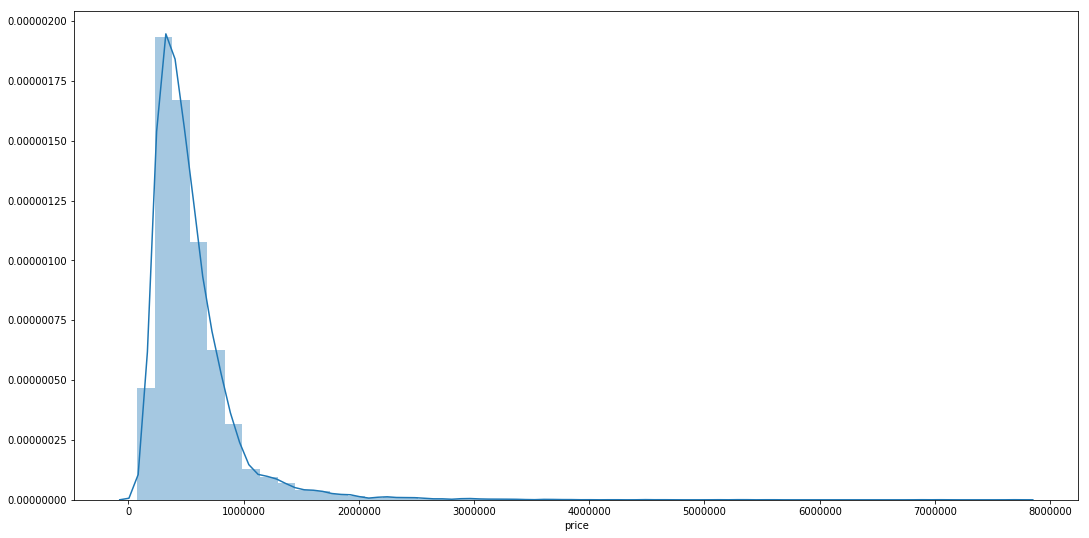

In [88]:
sns.distplot(df['price'],kde= True)

### Scatter plot of data on the basis of property built in a year and its price

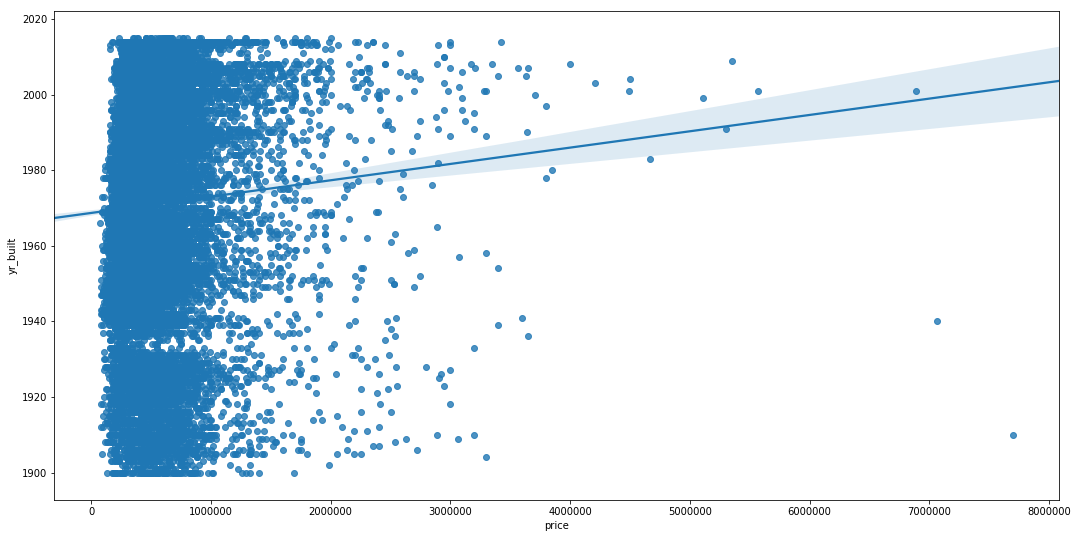

In [89]:
sns.regplot(x = 'price',y='yr_built',data = df,scatter = True)

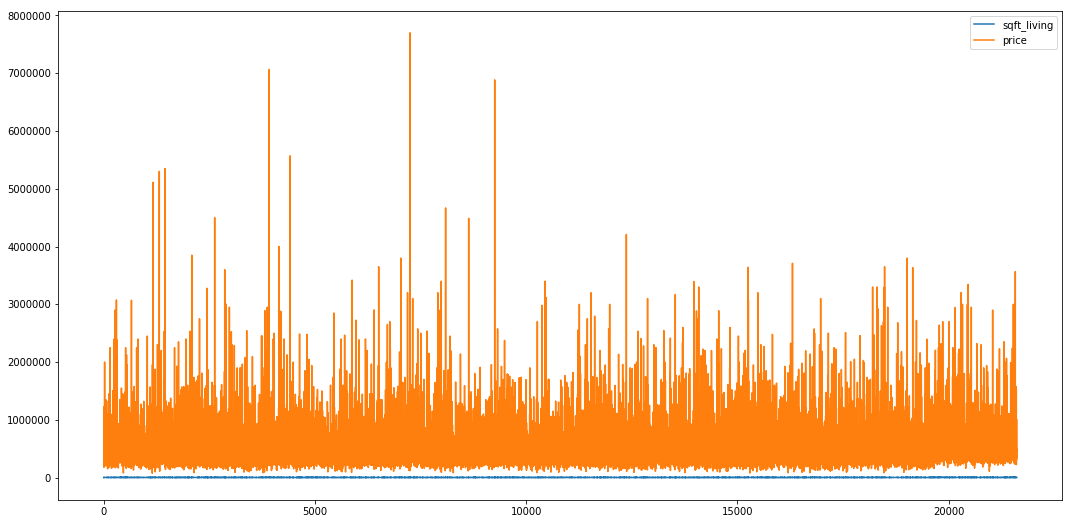

In [90]:
df_plot1 = df[['sqft_living','price']]
df_plot1.plot()

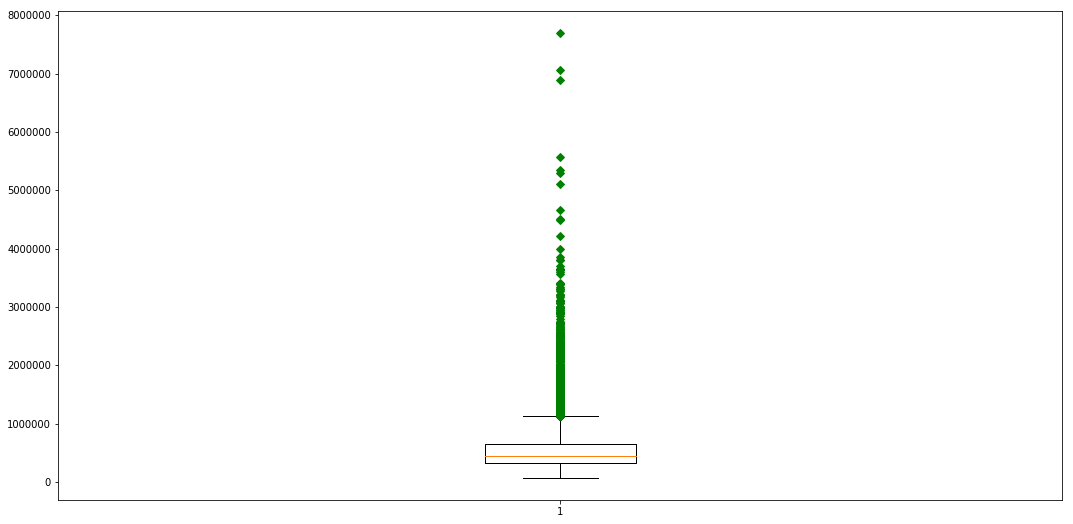

In [91]:
plt_box_v = plt.boxplot(df['price'], 0, 'gD')

                 price  yr_renovated  yr_built  sqft_living  sqft_lot  \
price         1.000000      0.126434  0.054012     0.702035  0.089661   
yr_renovated  0.126434      1.000000 -0.224874     0.055363  0.007644   
yr_built      0.054012     -0.224874  1.000000     0.318049  0.053080   
sqft_living   0.702035      0.055363  0.318049     1.000000  0.172826   
sqft_lot      0.089661      0.007644  0.053080     0.172826  1.000000   
grade         0.667434      0.014414  0.446963     0.762704  0.113621   

                 grade  
price         0.667434  
yr_renovated  0.014414  
yr_built      0.446963  
sqft_living   0.762704  
sqft_lot      0.113621  
grade         1.000000  


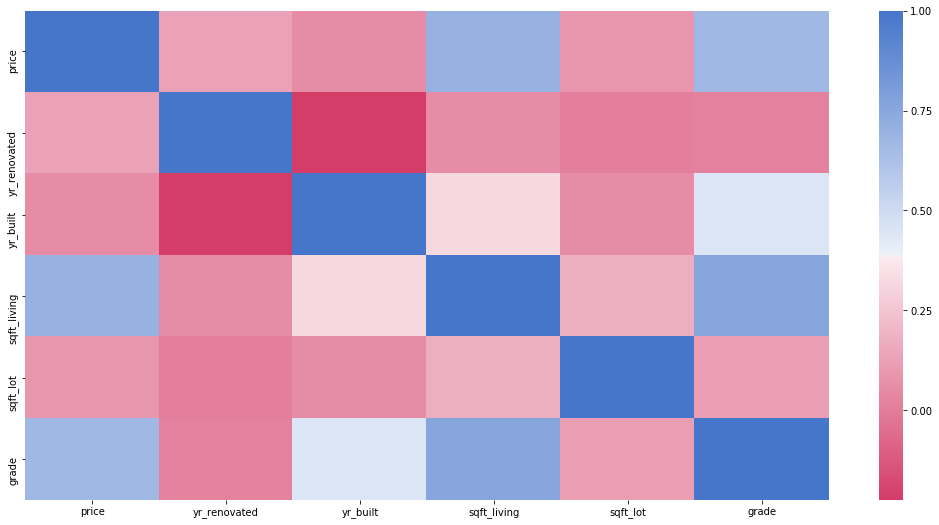

In [92]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['price', 'yr_renovated', 'yr_built', 'sqft_living','sqft_lot','grade']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

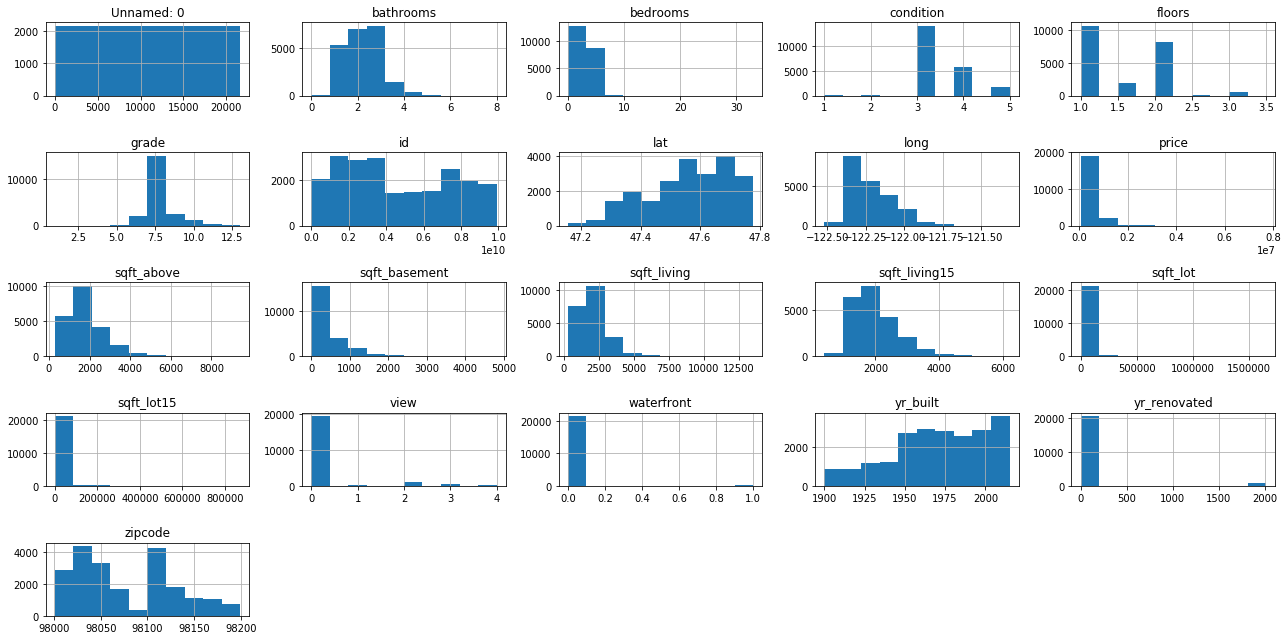

In [93]:
df.hist()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

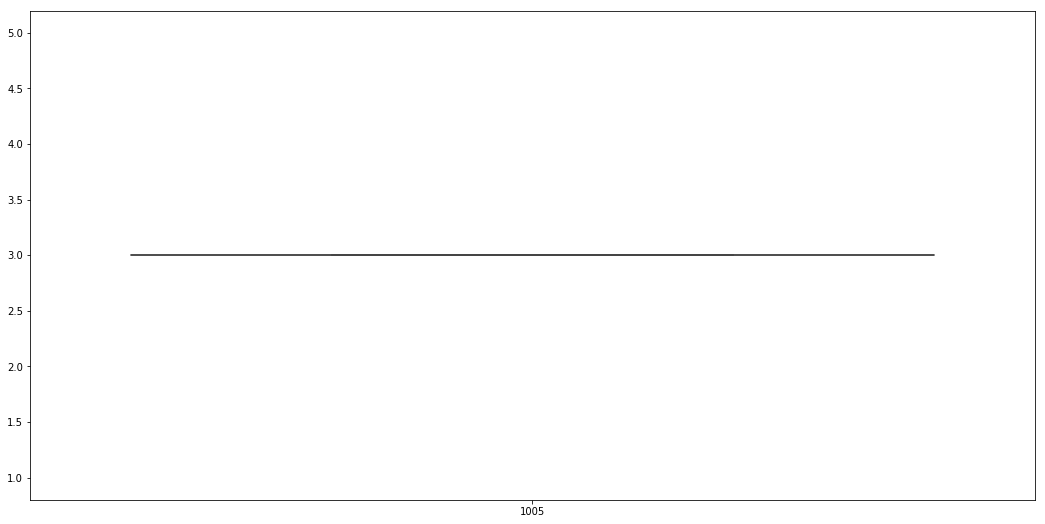

In [95]:
sns.boxplot(y="condition",x="price",data=df)
plt.show()
plt.figure(figsize=(35,10))

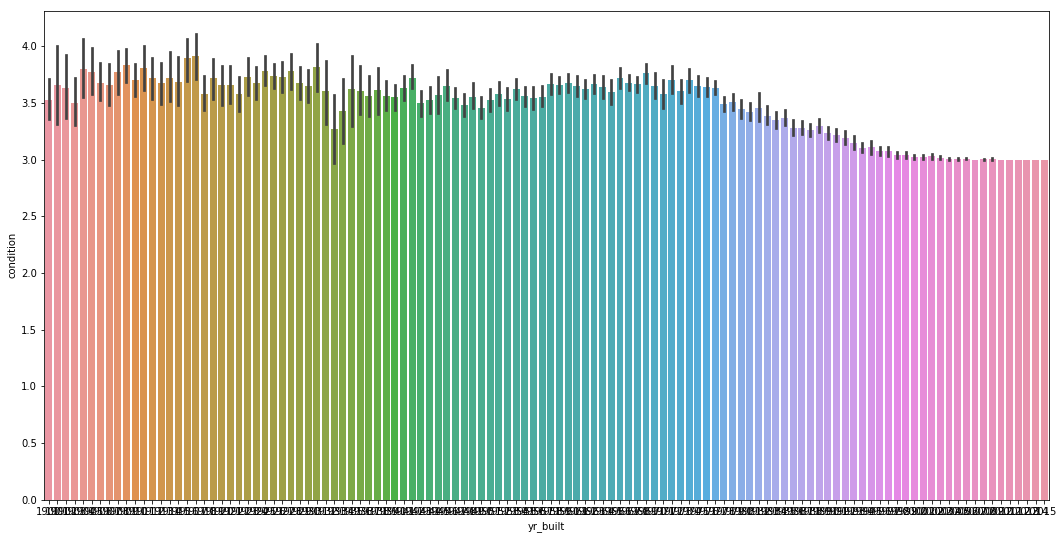

In [96]:
sns.barplot(x="yr_built",y="condition",data=df)

In [97]:
groupBy_year = df['yr_built']

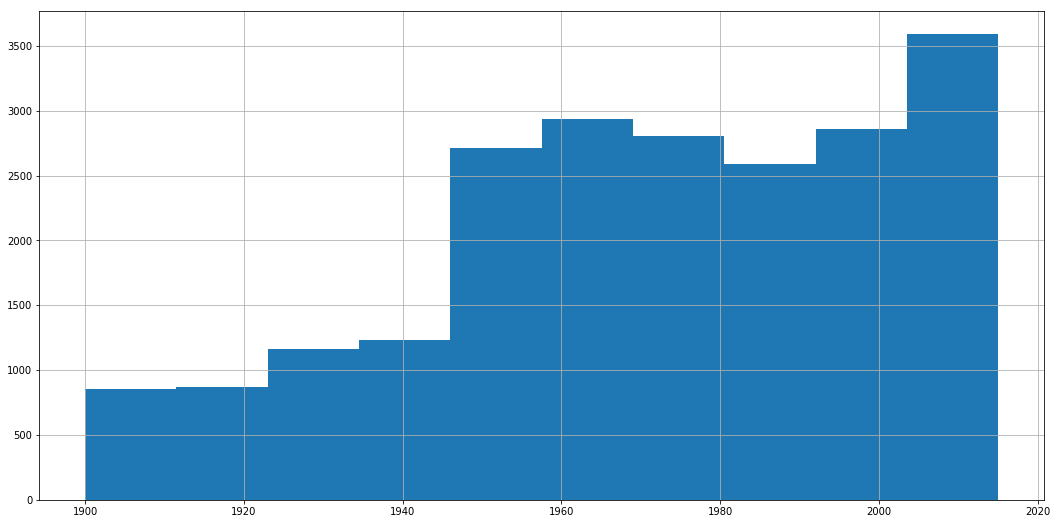

In [98]:
groupBy_year.hist()

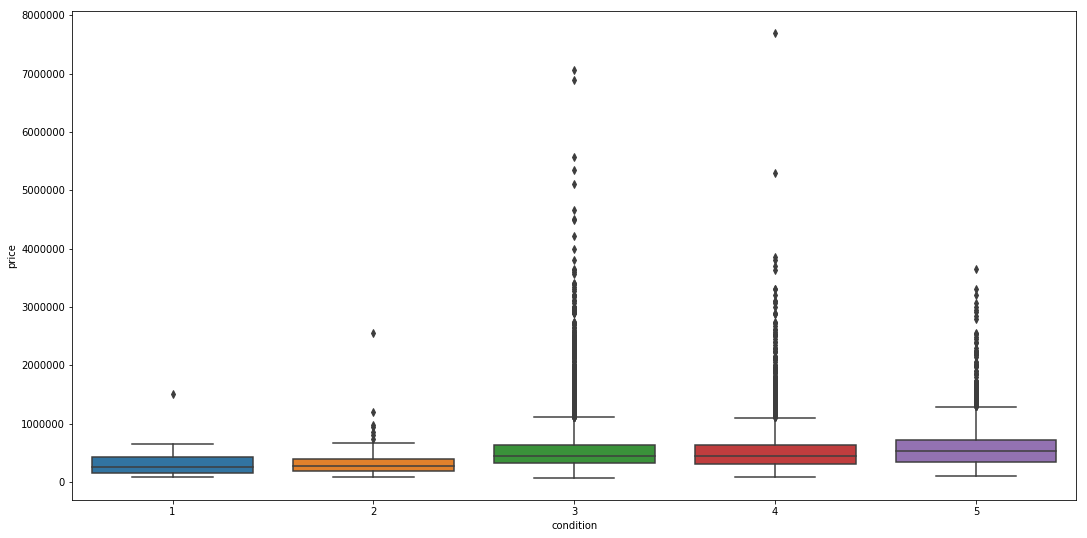

In [99]:
sns.boxplot(y="price",x="condition",data=df)
plt.show()
plt.figure(figsize=(35,10))

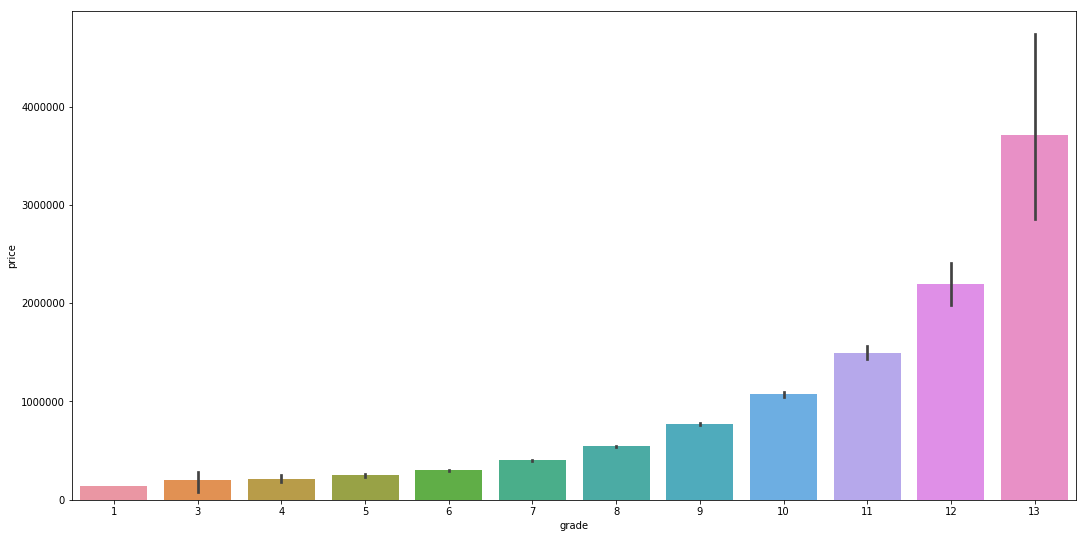

In [100]:
sns.barplot(y="price",x="grade", data=df)
plt.show()
plt.figure(figsize=(35,10))

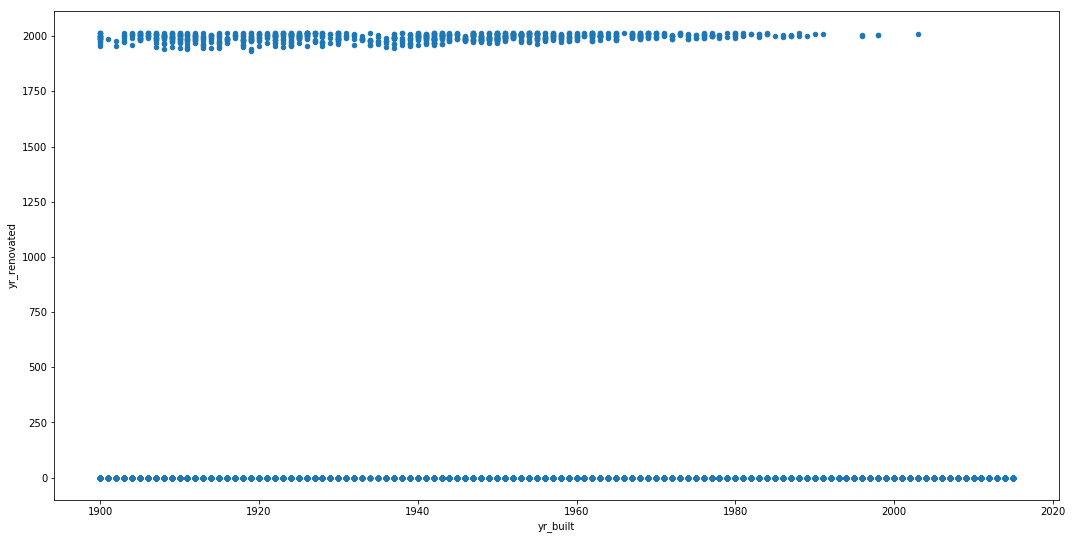

In [101]:
df.plot.scatter(x= 'yr_built',y = 'yr_renovated')

In [107]:
impute_grps = df.pivot_table(values=["condition"], index=["yr_built","price","sqft_living"], aggfunc=np.mean)
print (impute_grps)

                                condition
yr_built price     sqft_living           
1900     130000.0  600                4.0
         169900.0  910                4.0
         179000.0  1790               3.0
         192500.0  1080               3.0
         199999.0  960                5.0
         200000.0  1780               4.0
         210000.0  1020               3.0
                   1100               4.0
         214000.0  1020               4.0
         240000.0  1330               4.0
                   1553               3.0
         255500.0  1370               5.0
         265000.0  1122               3.0
         275000.0  1080               5.0
         285000.0  920                4.0
         325000.0  2330               3.0
         337500.0  1020               3.0
         352950.0  1760               1.0
         382888.0  620                3.0
         400000.0  1100               4.0
         415000.0  760                3.0
                   1410           